<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/Opt_%26_Sim_Final_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTIMIZATION AND SIMULATION FINAL QUESTION <font color="red">AND ANSWERS </font>

### Due: by 5:00pm on Monday, June 6, 2022

### Name: <font color="red"> Bart's Answers </font>

### Overall score: 47 / 47 pts

#### INSTRUCTIONS
1.	You may use any non-human resource at your disposal.  Please do not collaborate on this exam.  Avoid the temptation to ask anyone (other than me!) “just one little question.”  Do not ask Nacho.  He’s got a dissertation to complete!  Do your own work.  Email me if you have any questions. Begin the subject line with “O&S Final” (or I might miss your email).

2.	I will be monitoring my email all day on Monday.

3.	Lengthy answers are neither required nor recommended.  

4.	Provide your answers in this COLAB notebook. When you are done, send me a link to your COLAB notebook or email it to me.

5.	Before you start, it is wise to skim the exam and ask me any question you have so there is plenty of time for me to respond. Particularly if you think you have found an error in the exam, email me right away.  I will respond as soon as possible to the whole class.

6.	Monitor your own email and review corrections or clarification that I send out before sending me a new email.

7.	My grading style is to give credit for attempting a problem.  So, it would be in your interest not to skip any of the problems.  Give each one at least a good try. Point values are listed with the problem.

8.	Allow time for your software to hang, your computer to crash, and network to fail.  Save often!

9.	If you need to make assumptions to answer a question, do so and state those assumptions clearly.  However, please be sure you need to make them. Remember, email me if you have questions.

10.	Where a numeric answer is requested, use the decimal precision specified in the problem statement. 


#### GOOD LUCK!

### 1.	[10 pts] A shocking result.

Consider the set of differential equations that comes from the field of electronics.
$$\frac{dx}{dt}=z$$

$$\frac{dy}{dt}=x^2+y^2-4$$

$$\frac{dz}{dt}=-4x-x^2+y^2$$

with initial conditions $x_0=-1.8, y_0=-1.5, z_0=-2.5$.

Use Euler’s method to simulate these equations.  Determine the value of the differential equations over 100 periods in which you make 1000 calculations per period. In other words, the step size (dt) is 0.001 and you make a total of 100,000 calculations (= 100 periods * 1000 calculations/period). 

Provide an iteration plot with x, y, and z on one plot.  Then, provide a phase map for x and y and, on a separate plot, a phase map with x and z with x on the horizontal axis. On a separate plot, also provide a phase map for y and z with y on the horizontal axis.

Based on these plots, describe what is happening with these differential equations.

<font color="red">It wasn't until I looked at the first on returned that I saw an earlier wording on the problem statement.  In that version I inadvertantly omitted asking for the y-z plot.  I provide it below but don't expect that you would have included it. </font>

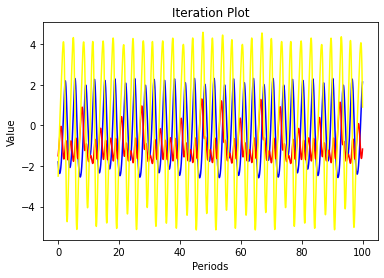

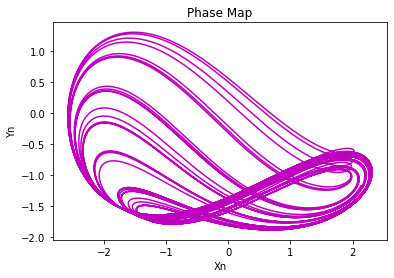

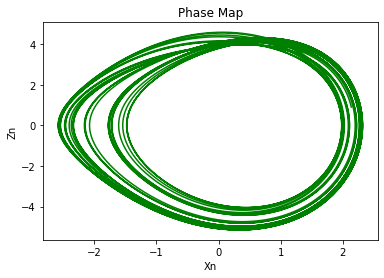

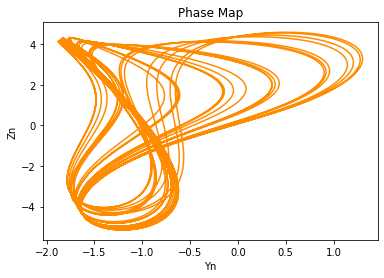

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff_eq(vars, dt):
    (x, y, z) = vars
    return x + dt*(z), y + dt*(x*x+y*y-4), z + dt*(-4*x-x*x+y*y)

vars = np.empty((1,3))
vars[0,:] = (-1.8, -1.5, -2.5)
periods = 100
dt = 0.001
for i in range(int(periods/dt)):
    vars = np.append(vars, [diff_eq(vars[i,:], dt)], axis=0)

period = np.arange(0,periods+dt,dt)
plt.plot(period, vars[:,0], c='b')
plt.plot(period, vars[:,1], c='r')
plt.plot(period, vars[:,2], c='yellow')
plt.title("Iteration Plot")
plt.xlabel("Periods")
plt.ylabel("Value")
plt.show()

plt.plot(vars[:,0], vars[:,1], c='m')
plt.title("Phase Map")
plt.xlabel("Xn")
plt.ylabel("Yn")
plt.show()

plt.plot(vars[:,0], vars[:,2], c='g')
plt.title("Phase Map")
plt.xlabel("Xn")
plt.ylabel("Zn")
plt.show()

plt.plot(vars[:,1], vars[:,2], c='darkorange')
plt.title("Phase Map")
plt.xlabel("Yn")
plt.ylabel("Zn")
plt.show()

<font color="red"> The periodicity of these phase maps and orbit-like behavior gives every indication of chaotic behavior in these equations with the specific initial conditions.  There is a similarity to the Lorenz system we talked about in class.</font>

<font color="red">From the x-y phase map, relatively solid trace from about (-1, -1.75) to about (1.5, -0.75) appears to cross over the other traces.  This gives the indication of two attractors with orbits that cross between them. In the x-z phase map this cross-over is more subtle but occurs at about (0.25, 4).  Together, these reinforce the idea of two attractors with orbits that "twist" in the middle.</font>

<font color="red">I didn't ask for it, but I have also included a y-z phase map. This one is more complicated.  On the left, is the bottom of the two loops.  On the far right of the y-z phase map are the "tops" of the larger loops in the x-y phase map </font>

#### 2.	[15 pts total] A nice bonus, for some.
A firm trying to sell its product has determined the supply and demand functions are: 
$$S(Q)=5+ln(Q+10)$$

$$D(Q)=10+\frac{100}{Q+2}$$
####In this problem, we will determine the customer and producer surplus using Monte Carlo methods.  

#### a) [5 pts] Calculate both the equilibrium quantity and price. 

To find the equilibrium quantity, $Q_{eq}$, a Monte Carlo search can be performed.  Since 
1. both functions are non-negative for $Q ≥ 0$
2. the supply function is strictly increasing
3. the demand function is strictly decreasing

there is an equillibrium point for $Q > 0$. 

At $Q = 0, D(Q) > S(Q)$.  This will be the first lower bound for the search.  Use $Q = 500$ as the first upper bound since at this point, $D(Q) < S(Q)$.

At each iteration, choose a random number, $Q_i$ between the lower bound and the upper bound.  If $D(Q_i) > S(Q_i)$, set the next lower bound to $Q_i$. Otherwise, set the next upper bound to $Q_i$.  Continue until the tolerance level (the difference between the upper bound and the lower bound) is less than one.  At that point, the integer equilibrium value of $Q_{eq}$ will be the only integer value between the bounds.

To speed the calculation use the triangular distribution ([`numpy.random.Generator.triangular`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.triangular.html)) with the lower bound as the `left` parameter, the midpoint of the lower and upper bound as the `mode`, and the upper bound as the `right` parameter.

In [ ]:
import numpy as np

def supply(Q):
  return 5+np.log(Q+10)

def demand(Q):
  return 10+100/(Q+2)

lower_Q = 0
upper_Q = 500
epsilon = 1

while upper_Q - lower_Q > epsilon:
  Q = np.random.triangular(lower_Q, (lower_Q+upper_Q)/2, upper_Q)
  if demand(Q) > supply(Q):
    lower_Q = Q
  else:
    upper_Q = Q

print(lower_Q, upper_Q)

221.29792369765207 222.10185334985303


<font color="red"> The integer value of the equilibrium quantity is 222 and price 10.45.</font>

####b) [4 pts] Cusumer surplus.

At the equilibrium price, some customers receive a lower price than they would have paid. The customer surplus, then, is the area between the equilibrium price and the demand curve from a quantity of 0 to the equilibrium quantity.  Use dart method from Monte Carlo integration to determine the customer surplus to two decimal places. Use 1,000,000 samples.

In [ ]:
def demand(Q):
  return 10+100/(Q+2)

samples = 1000000
min_q = 0
eq_q = 222
eq_p = demand(eq_q)
max_p = demand(0)

Q = demand(np.random.uniform(min_q,eq_q,samples))
P = np.random.uniform(eq_p,max_p,samples)

print(eq_q*(max_p-eq_p)*np.sum(P < Q)/samples)

369.9993636


<font color="red"> The customer surplus is 370.00.</font>

####c) [6 pts] Producer surplus.
At the equilibrium price, some producers receive a higher price than they would required. The producer surplus, then, is the area between the supply curve and the equilibrium price from a quantity of 0 to the equilibrium quantity.  Use the average area method from Monte Carlo integration to determine the producer surplus to two decimal places. Calculate 1,000,000 samples. Since each random draw gives you a height, it also gives you a sample of the area.  Use these sample areas to determine the average area and the standard deviation for these samples.  Finally, determine the standard deviation of the average area.

In [ ]:
def supply(Q):
  return 5+np.log(Q+10)

Q = np.random.uniform(min_q,eq_q,samples)
s = eq_q*(eq_p-supply(Q))
aver = np.sum(s)/samples
SE = np.sqrt(np.sum(np.square(s-aver))/(samples-1))
SEM = SE/np.sqrt(samples)

print(aver, SE, SEM)

191.36023084353627 162.40109666826365 0.16240109666826366


<font color="red"> The average for the producer surplus is 191.30, the standard deviation of these area samples is 162.40, and the standard deviation for the average area is 0.16. </font>

####3. [22 points total] Call up the reserves!
One of the most difficult decisions for a commander is how many forces to put engaged on the front lines and how many to hold back to reinforce later.

Consider the Dewar simulation developed in class and included below. In each of the following questions, represent a battle between red and blue forces in which red has a total of 3,400 soldiers and blue has a total of 2,100 soldiers. To answer the questions, you may (will) need to make some adjustments to the simulation.

####a) [7 pts] Plan A.

Red initially plans to attack with 1,900 holding 1,500 for reinforcements and blue defends with 600 holding 1,500 for reinforcements.  Assume all other assumptions of the Dewar model are maintained.  To make it easier to answer the following questions, you may need to make some small adjustments to your simulation.
1.	Who wins?
2.	After how many time units?
3.	Which of the four withdraw criteria caused the withdraw?
4.	Rounding to two decimal places, how many red forces (those that were engaged as well as those that were in reserve) at the time of the withdraw? to the nearest 1%, what percent of the total red forces as casualties?
5.	Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw? To the nearest 1%, what percent of the total blue forces are casualties?
6.  Summarize the changes you made to the code to get these answers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #print(side+' reinforces at', period, reinforce_details)
            blocks[iside][0] -= 1
            activated[iside] = blocks[iside][1]
    return blocks, activated

def withdrawn(period, forces, force_ratio, thresholds):
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            withdraw_details = withdraw_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            print(side+' withdraws at', period, withdraw_details)
    return withdraw

In [7]:
def Dewar_Sim(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    print('Red engaged:', red[period], 'remaining reinforcement blocks:', blocks[0][0])
    print('Blue engaged:', blue[period], 'remaining reinforcement blocks:', blocks[1][0]) 
    return withdraw[1]

In [8]:
winner = []
sides = ['red', 'blue']
Dewar_Sim(1900, 600)

red withdraws at 1845  Engaged: 1328.980 1330.0
Red engaged: 1328.9803997241997 remaining reinforcement blocks: 0
Blue engaged: 583.6347771587252 remaining reinforcement blocks: 0


'red'

<font color="red"> Put your 6 answers here:\
a 1) Blue \
a 2) 1845 time units \
a 3) Red forces fall below the 70% of initial forces threshold \
a 4) 1328.98 red engaged with no remaining reinforcements. 65% casualties. \
a 5) 583.63 blue engaged with no remaining reinforcements. 72% casualties. \
a 6) I took off the comment on the print in the withdrawn function and added two print statements at the end of the Dewar_Sim function: \
> * print('Red engaged:', red[period], 'remaining reinforcement blocks:', blocks[0][0])
* print('Blue engaged:', blue[period], 'remaining reinforcement blocks:', blocks[1][0]) \
In then just ran: \
* Dewar_Sim(1900, 600) </font>

####b) [15 pts] Plan B.
The red commander, Gen. Rich, is aware that blue is putting 600 soldiers on the front line and holding 1,500 as reinforcements.  Gen. Rich believes there must be a strategy for employing his forces that allows him to win (his primary desire) and with the win, to preserve as many of his soldiers as possible (his secondary desire).

Gen. rich knows that he must attack with at least 1,800 of his men in order to have a 3:1 advantage.  He will not consider a strategy with less than this initial attacking force.  Of course, he cannot attack with more than 3,400 (his maximum number of forces). Furthermore, he is only interested in increments of 10 soldiers from (and including) 1,800 to 3,400.

Whatever forces he does not use in the initial attack are kept in reserve and used according to the threshold, quanity in a block, and delay rules.  

As he thinks this through, he realizes that he might want to attack with an initial force that does not leave a number of reinforcements that is evenly divisible by 300 (the quantity in each reinforcement block).  In this case, all but the last reinforcement block will have 300 and the last one will have the remainder.  For example, if he attacks with 2,600 soldiers, he will have 800 in reserve.  This will allow him to have three reinforcement blocks.  The first two will have 300 and the last one will have the remaining 200.

b 1) Is Gen. Rich able to find a reinforcement strategy that allows him to win?  Describe the changes you made to your code to answer this question.  Also, provide a version of you code with comments showing what you changed.

In [ ]:
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #print(side+' reinforces at', period, reinforce_details)
            #Added a fractional multiplier for the block size of the last reinforcement block 
            #which will be between 0 and 1 if the total reinforcements is not divisible by 300. 
            mult = 1
            if blocks[iside][0] < 1:
                mult = blocks[iside][0]
            blocks[iside][0] -= 1
            activated[iside] = mult*blocks[iside][1]  #The multiplier is used here.
    return blocks, activated

def withdrawn(period, forces, force_ratio, thresholds):
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            withdraw_details = withdraw_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            print(side+' withdraws at', period, withdraw_details)
    return withdraw

In [ ]:
#Added red_reinforcements argument to Dewar_Sim
def Dewar_Sim(init_red, red_reinforecements, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    #Caluclated how many blocks including the fraction of a block for the last block
    blocks = [[red_reinforecements/300, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))
            
        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
        
    print(period, red[period], blocks[0][0], blue[period], blocks[1][0])
    return withdraw[1], red[period] + max(0, blocks[0][0]*blocks[0][1])

In [ ]:
winner = np.empty((1,2))
#Added loop for red reinforcements and at it to the parameter list for Dewar_Sim
for red_reinf in range(0,1600,10): 
    winner = np.append(winner,[Dewar_Sim(3400-red_reinf, red_reinf, 600)], axis=0)

#I also added this statement to capture the maximum and the index so I can determine 
#how many red reinforcements maximize the remaining red forces
max_red, idx = max((v,i) for i,v in enumerate(winner[:,1]))
print('Withdraw:', winner[idx][0], '.  Initial red:', 3400-(idx-1)*10, 'red remaining:', max_red)

Withdraw: blue .  Initial red: 2060 red remaining: 3213.0952681055096


<font color="red"> b 1) Yes, he is able to find a strategy in which he wins. 

First, in the main program, I added red_reinf and a loop from 0 to 1,600 in steps of 10.  Then, I increased the arguments for Dewar_Sim to include not only the initial red but the red reinforcements, too. Third, I calculated the number of blocks including the fraction of a block (for the last block),  Finally, I added code in reinforcement so that if the number of blocks is less than 1 (a prior if statement guarentees that at that point the number of blocks will be greater than 0) then the fractional amount of a block is used as a multiplier against the block size (300). </font>

####If Gen. Rich is able to find a winning strategy, answer these questions: 
2.	How many red forces are initially engaged? How many are initially held as reinforcements?
3.	After how many time units?
4.	Which of the four withdraw criteria caused the withdraw?
5.	Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw?
6. Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw?

In [ ]:
Dewar_Sim(2060,1340,600)

blue withdraws at 188  Engaged: 419.937 420.0
188 1873.0952681055096 4.466666666666667 419.9370483142114 4


('blue', 3213.0952681055096)

<font color="red"> Put your 5 answers here:\
b 2) 2,060 initially engaged, 1,340 initially held as reinforcements. \
b 3) 188 time periods. \
b 4) Blue forces engaged dropped below 0.7*600 = 420. \
b 5) At the end, red has 1,873.10 engaged and 1,340 in red reinforcements. \
b 6) At the end, blue has 419.94 engaged and 1,200 in red reinforcements. </font>